In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

In [2]:
# prep for double exponential fits
def double_exp(x, a, b, c, d):
    return a * np.exp(b * x) + c * np.exp(d * x)
def triple_exp(x, a, b, c, d, e, f):
    return a * np.exp(b * x) + c * np.exp(d * x) + e * np.exp(f * x)

# Correlation Propagator

In [5]:
correlations = np.genfromtxt("correlation_to_equal_time.csv", delimiter=",")
average = correlations.mean(axis=1)
sem = stats.sem(correlations, axis=1)
average_to_max = average[0:np.argmax(average)]
sem_to_max = sem[0:np.argmax(average)]
# Adjust the following line for each system to make everything ns.
taus = np.arange(1,np.argmax(average)+1)/10


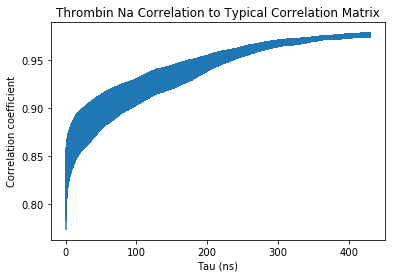

In [6]:
plt.errorbar(taus, average_to_max, sem_to_max)
plt.title('Thrombin Na Correlation to Typical Correlation Matrix')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.savefig('ThrombinNa_prop_max_correlation_to_equaltime.png')

Bars are standard error

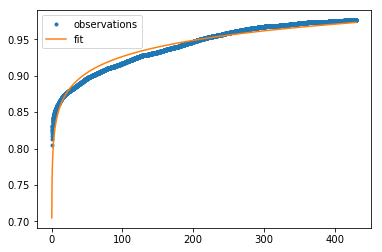

In [7]:
np.polyfit(np.log(taus), average_to_max, 1)
#y = 0.0320975*log(x) + 0.77860534
yhat = 0.0320975*np.log(taus) + 0.77860534
plt.plot(taus, average_to_max, '.', taus, yhat, '-')
plt.legend(['observations', 'fit'])
plt.savefig('FIT_ThrombinNa_prop_max_correlation_to_equaltime.png')

$$y = 0.0320975*log(x) + 0.77860534$$

[ -4.16218473e+01   1.51054803e-03   4.24911877e+01   1.49062490e-03]


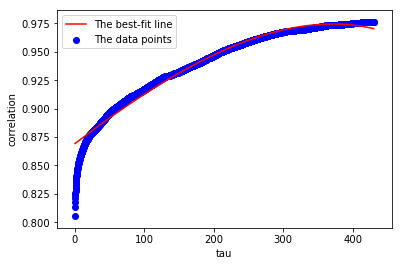

In [8]:
popt, pcov = curve_fit(double_exp,taus,average_to_max,p0=(0.75,0.04,0,0),maxfev=10000)
print(popt)
curvey = double_exp(taus,popt[0],popt[1], popt[2], popt[3]) # This is your y axis fit-line
plt.plot(taus, curvey, 'red', label='The best-fit line')
plt.scatter(taus,average_to_max, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('tau')
plt.ylabel('correlation')
plt.show()
plt.savefig('doubleFIT_ThrombinNa_prop_max_correlation_to_equaltime.png')

$$y = -4.16218473\times10^{1} e^{1.51054803\times10^{-3}x} + 4.24911877\times10^{1} e^{1.49062490\times10^{-3}x}$$

[ -8.55915379e+00   1.54799043e-03   9.41920565e+00   1.45474460e-03
   9.29201454e-03   1.45472252e-03]


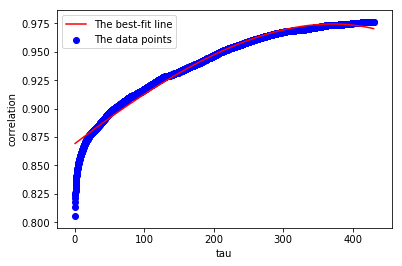

In [10]:
popt, pcov = curve_fit(triple_exp,taus,average_to_max,p0=(-4.2,0.0015,4.2,0.0015,0,0),maxfev=10000)
print(popt)
curvey = triple_exp(taus,popt[0],popt[1], popt[2], popt[3], popt[4], popt[5]) # This is your y axis fit-line
plt.plot(taus, curvey, 'red', label='The best-fit line')
plt.scatter(taus,average_to_max, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('tau')
plt.ylabel('correlation')
plt.show()
plt.savefig('tripleFIT_ThrombinNa_prop_max_correlation_to_equaltime.png')

$$y = -8.55915379 e^{1.54799043e\times10^{-3}x} + 9.41920565 e^{1.45474460\times10^{-3}x} + 9.29201454\times10^{-3} e^{1.45472252\times10^{-3}}$$

# Time Lagged

In [15]:
TLcorrelations = np.genfromtxt("TLcorrelation_to_equal_time.csv", delimiter=",")
TLaverage = TLcorrelations.mean(axis=1)
TLsem = stats.sem(TLcorrelations, axis=1)
# Adjust the following line for each system to make everything ns.
TLtaus = np.arange(1,len(TLaverage)+1)/10

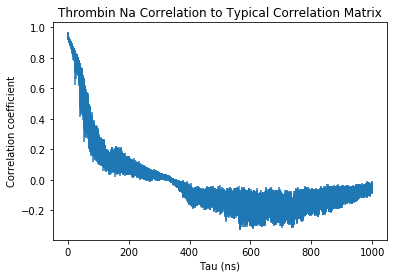

In [16]:
plt.errorbar(TLtaus, TLaverage, TLsem)
plt.title('Thrombin Na Correlation to Typical Correlation Matrix')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.savefig('ThrombinNa_TL_correlation_to_equaltime.png')

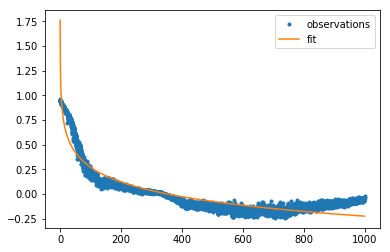

In [17]:
np.polyfit(np.log(TLtaus), TLaverage, 1)
# y = -0.2157465*log(x) + 1.26548021
yhat = -0.2157465*np.log(TLtaus) + 1.26548021
plt.plot(TLtaus, TLaverage, '.', TLtaus, yhat, '-')
plt.legend(['observations', 'fit'])
plt.savefig('FIT_ThrombinNa_TL_correlation_to_equaltime.png')

$$y = -0.2157465*log(x) + 1.26548021$$

[  1.07124887e+00  -9.23505291e-03  -1.16934538e-01   1.34271759e-04]


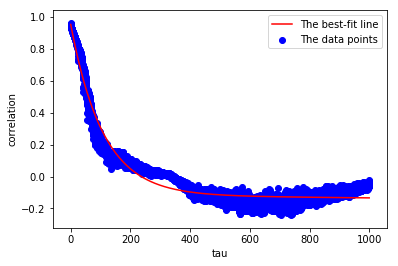

In [18]:
popt, pcov = curve_fit(double_exp,TLtaus,TLaverage,p0=(1.6,-0.29,0,0),maxfev=10000)
print(popt)
curvey = double_exp(TLtaus,popt[0],popt[1],popt[2],popt[3]) # This is your y axis fit-line
plt.plot(TLtaus, curvey, 'red', label='The best-fit line')
plt.scatter(TLtaus, TLaverage, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('tau')
plt.ylabel('correlation')
plt.show()
plt.savefig('doubleFIT_ThrombinNa_TL_correlation_to_equaltime.png')

$$y = 1.07124887 e^{-9.23505291\times10^{-3}x} + -1.16934538\times10^{-1} e^{1.34271759\times10^{-4}x}$$

[ 1.03939406 -0.01172823 -1.19519705  0.00421015  1.16722555  0.00423379]


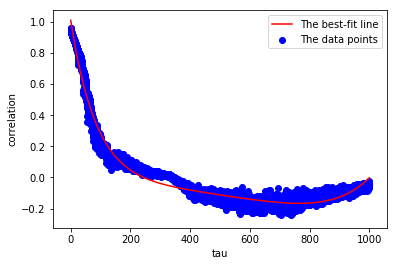

In [19]:
popt, pcov = curve_fit(triple_exp,TLtaus,TLaverage,p0=(3.9,-0.0061,-3.89,-.00061,0,0),maxfev=10000)
print(popt)
curvey = triple_exp(TLtaus,popt[0],popt[1],popt[2],popt[3], popt[4], popt[5]) # This is your y axis fit-line
plt.plot(TLtaus, curvey, 'red', label='The best-fit line')
plt.scatter(TLtaus, TLaverage, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('tau')
plt.ylabel('correlation')
plt.show()
plt.savefig('tripleFIT_ThrombinNa_TL_correlation_to_equaltime.png')

$$y = 1.03939406 e^{0.01172823x} + -1.19519705 e^{0.00421015x} + 1.16722555 e^{0.00423379x}$$